In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import fuzzymath

In [2]:
#UNIVERSITY ACCEPTANCE

In [3]:
gre_score = ctrl.Antecedent(np.arange(0, 361, 1), 'gre_score')
cgpa = ctrl.Antecedent(np.arange(0, 11, 0.5), 'cgpa')
publications = ctrl.Antecedent(np.arange(0, 6, 1), 'publications')
ranking = ctrl.Antecedent(np.arange(0,1000, 100), 'ranking')
possibility = ctrl.Consequent(np.arange(0, 101, 1), 'possibility')

In [4]:
gre_score['low'] = fuzz.trimf(gre_score.universe, [0, 0, 250])
gre_score['medium'] = fuzz.trimf(gre_score.universe, [200, 280, 320])
gre_score['high'] = fuzz.trimf(gre_score.universe, [280,360,360])

In [5]:
cgpa['low'] = fuzz.trimf(cgpa.universe, [0, 0,6.5])
cgpa['medium'] = fuzz.trimf(cgpa.universe, [4,7.5,9])
cgpa['high'] = fuzz.trimf(cgpa.universe, [8.5,8.5,10])

In [6]:
publications['low'] = fuzz.trimf(publications.universe, [0, 0, 2])
publications['medium'] = fuzz.trimf(publications.universe, [1, 2, 3])
publications['high'] = fuzz.trimf(publications.universe, [3,3,5])

In [7]:
ranking['low'] = fuzz.trimf(ranking.universe, [700, 800, 1000])
ranking['medium'] = fuzz.trimf(ranking.universe, [200,600,800])
ranking['high'] = fuzz.trimf(ranking.universe, [0,0,200])

In [8]:
possibility['low'] = fuzz.trimf(possibility.universe, [0, 0, 30])
possibility['medium'] = fuzz.trimf(possibility.universe, [30, 50, 70])
possibility['high'] = fuzz.trimf(possibility.universe, [60,80,100])

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


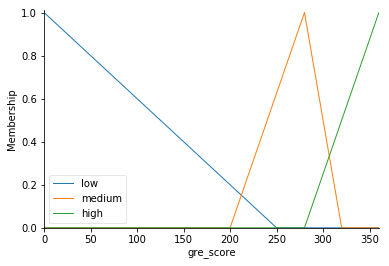

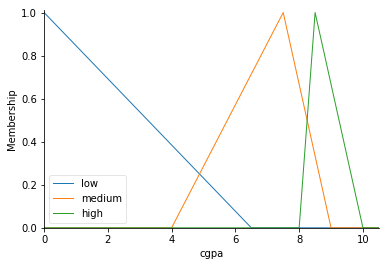

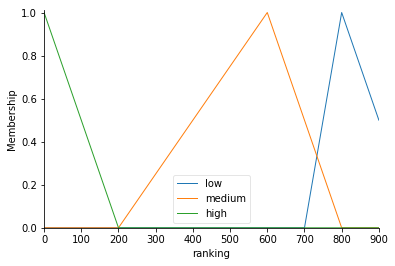

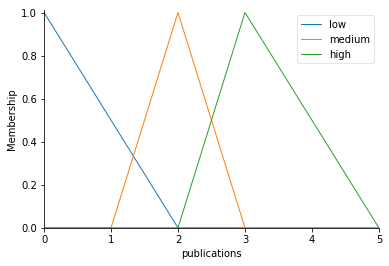

In [9]:
gre_score.view()
cgpa.view()
ranking.view()
publications.view()

In [10]:
rule1 = ctrl.Rule((gre_score['low'] | cgpa['low']) & ranking['high'], possibility['low'])
rule2 = ctrl.Rule((gre_score['low'] | cgpa['low']) & ranking['low'] , possibility['medium'])
rule3 = ctrl.Rule((gre_score['medium'] | gre_score['high']) & (cgpa['medium'] | cgpa['high']) & ranking['low'] , possibility['high'])
rule4 = ctrl.Rule(gre_score['medium'] & (cgpa['high'] | publications['medium']) & ranking['high'] , possibility['medium'])
rule5 = ctrl.Rule(gre_score['high'] & cgpa['high'] & (publications['medium'] | publications['high']) & ranking['high'], possibility['high'])
rule6 = ctrl.Rule(gre_score['medium'] & (cgpa['high'] | publications['high']) & ranking['medium'], possibility['high']) 
rule7 = ctrl.Rule(gre_score['low'] & cgpa['low'] & publications['low'] & ranking['high'], possibility['low'])
rule8 = ctrl.Rule(gre_score['medium'] & cgpa['medium'] &(publications['low']|publications['medium']|publications['high'])& ranking['medium'], possibility['medium'])
rule9 = ctrl.Rule(gre_score['low'] & cgpa['low'] & (publications['medium']|publications['low']|publications['high']) & ranking['medium'], possibility['low'])
# rule1.view()

In [11]:
university_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])
predict = ctrl.ControlSystemSimulation(university_ctrl)

In [36]:
predict.input['gre_score'] = 340
predict.input['ranking'] = 90
predict.input['cgpa'] = 9.8
predict.input['publications'] = 2

# Crunch the numbers
predict.compute()

80.0


/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


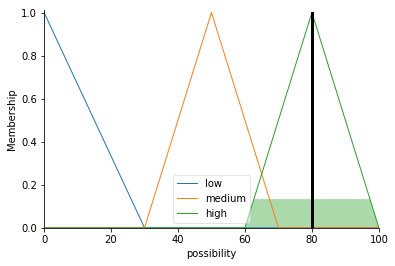

In [37]:
print(predict.output['possibility'])
possibility.view(sim=predict)

In [62]:
#MORTGAGE APLCATION

In [63]:
#HOME EVALUATION

In [64]:
market_value = ctrl.Antecedent(np.arange(0, 100, 1), 'market_value')
location = ctrl.Antecedent(np.arange(0, 11, 1), 'location')
house = ctrl.Consequent(np.arange(0, 11, 1), 'house')

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


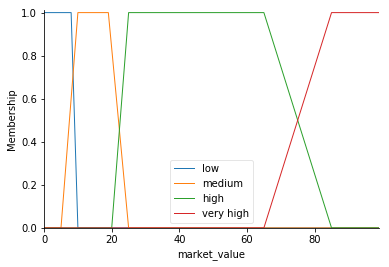

In [65]:
market_value['low'] = fuzz.trapmf(market_value.universe, [0,0,8,10])
market_value['medium'] = fuzz.trapmf(market_value.universe, [5, 10, 19, 25])
market_value['high'] = fuzz.trapmf(market_value.universe, [20,25,65,85])
market_value['very high'] = fuzz.trapmf(market_value.universe, [65,85,100,100])
market_value.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


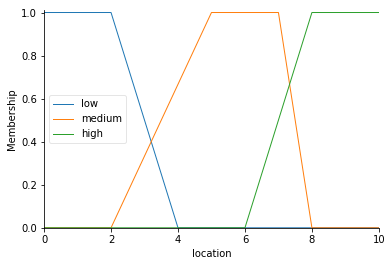

In [66]:
location['low'] = fuzz.trapmf(location.universe, [0, 0, 2,4])
location['medium'] = fuzz.trapmf(location.universe, [2,5,7,8])
location['high'] = fuzz.trapmf(location.universe, [6,8,10,10])
location.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


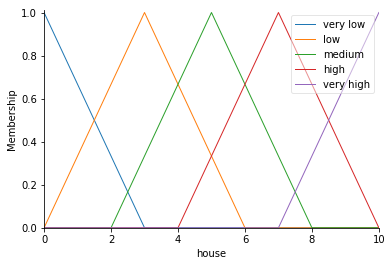

In [67]:
house['very low'] = fuzz.trimf(house.universe, [0, 0,3])
house['low'] = fuzz.trimf(house.universe, [0,3,6])
house['medium'] = fuzz.trimf(house.universe, [2,5,8])
house['high'] = fuzz.trimf(house.universe, [4,7,10])
house['very high'] = fuzz.trimf(house.universe, [7,10,10])
house.view()

In [68]:
#define rules
rule1 = ctrl.Rule(market_value['low'] , house['low'])
rule2 = ctrl.Rule(location['low'] , house['low'])
rule3 = ctrl.Rule(location['low'] & market_value['low'], house['very low'])
rule4 = ctrl.Rule(location['low'] & market_value['medium'], house['low'])
rule5 = ctrl.Rule(location['low'] & market_value['high'], house['medium'])
rule6 = ctrl.Rule(location['low'] & market_value['very high'], house['high'])
rule7 = ctrl.Rule(location['low'] & market_value['low'], house['low'])
rule8 = ctrl.Rule(location['low'] & market_value['medium'], house['medium'])
rule9 = ctrl.Rule(location['low'] & market_value['high'], house['high'])
rule10 = ctrl.Rule(location['low'] & market_value['very high'], house['very high'])
rule11 = ctrl.Rule(location['high'] & market_value['low'], house['medium'])
rule12 = ctrl.Rule(location['high'] & market_value['medium'], house['high'])
rule13 = ctrl.Rule(location['high'] & market_value['high'], house['very high'])
rule14 = ctrl.Rule(location['high'] & market_value['very high'], house['very high'])

In [69]:
house_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14])
predict_house = ctrl.ControlSystemSimulation(house_ctrl)

In [70]:
predict_house.input['market_value'] = 10
predict_house.input['location'] = 1

# Crunch the numbers
predict_house.compute()

4.0


/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


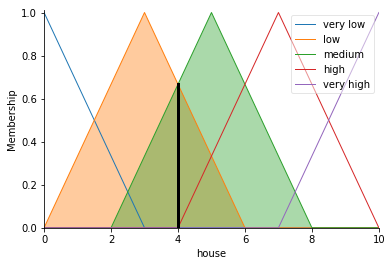

In [71]:
house_value = predict_house.output['house']
print(house_value)
house.view(sim=predict_house)

In [72]:
#APPLICATION EVALUATION

In [73]:
asset = ctrl.Antecedent(np.arange(0, 1000, 50), 'asset')
income = ctrl.Antecedent(np.arange(0, 100, 5), 'income')
applicant = ctrl.Consequent(np.arange(0, 11, 0.2), 'applicant')

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


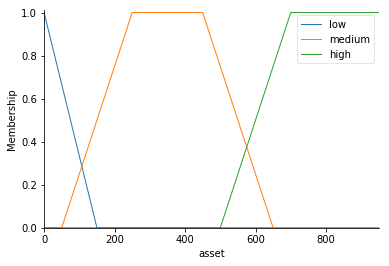

In [74]:
asset['low'] = fuzz.trimf(asset.universe, [0, 0,150])
asset['medium'] = fuzz.trapmf(asset.universe, [50,250,450,650])
asset['high'] = fuzz.trapmf(asset.universe, [500,700,1000,1000])
asset.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


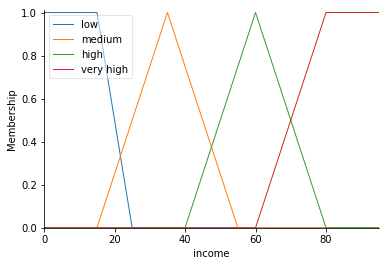

In [75]:
income['low'] = fuzz.trapmf(income.universe, [0, 0,15,25])
income['medium'] = fuzz.trimf(income.universe, [15,35,55])
income['high'] = fuzz.trimf(income.universe, [40,60,80])
income['very high'] = fuzz.trapmf(income.universe, [60,80,100,100])
income.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


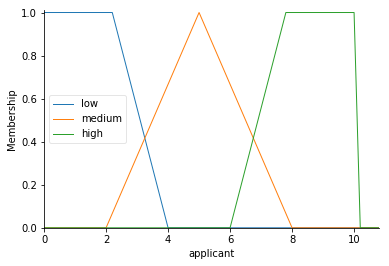

In [76]:
applicant['low'] = fuzz.trapmf(applicant.universe, [0, 0,2.2,4])
applicant['medium'] = fuzz.trimf(applicant.universe, [2,5,8])
applicant['high'] = fuzz.trapmf(applicant.universe, [6,7.8,10,10])
applicant.view()

In [77]:
#define rules
rule1 = ctrl.Rule(asset['low'] & income['low'] , applicant['low'])
rule2 = ctrl.Rule(asset['low'] & income['medium'] , applicant['low'])
rule3 = ctrl.Rule(asset['low'] & income['high'] , applicant['medium'])
rule4 = ctrl.Rule(asset['low'] & income['very high'] , applicant['high'])
rule5 = ctrl.Rule(asset['medium'] & income['low'] , applicant['low'])
rule6 = ctrl.Rule(asset['medium'] & income['medium'] , applicant['medium'])
rule7 = ctrl.Rule(asset['medium'] & income['high'] , applicant['high'])
rule8 = ctrl.Rule(asset['medium'] & income['very high'] , applicant['high'])
rule9 = ctrl.Rule(asset['high'] & income['low'] , applicant['medium'])
rule10 = ctrl.Rule(asset['high'] & income['medium'] , applicant['medium'])
rule11 = ctrl.Rule(asset['high'] & income['high'] , applicant['high'])
rule12 = ctrl.Rule(asset['high'] & income['very high'] , applicant['high'])

In [78]:
app_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
predict_app = ctrl.ControlSystemSimulation(app_ctrl)

In [79]:
predict_app.input['asset'] = 300
predict_app.input['income'] = 50

# Crunch the numbers
predict_app.compute()

6.9235257833703425


/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


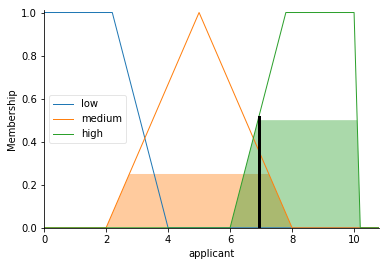

In [80]:
app_value = predict_app.output['applicant']
print(app_value)
applicant.view(sim=predict_app)

In [81]:
#CREDIT EVALUATION

In [82]:
interest = ctrl.Antecedent(np.arange(0, 10, 0.5), 'interest')
applicant = ctrl.Antecedent(np.arange(0, 11, 0.2), 'applicant')
house = ctrl.Antecedent(np.arange(0, 11, 1), 'house')
credit = ctrl.Consequent(np.arange(0, 11, 1), 'credit')

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


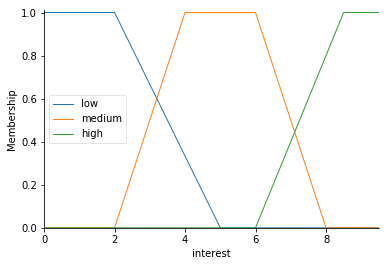

In [83]:
interest['low'] = fuzz.trapmf(interest.universe, [0, 0, 2,5])
interest['medium'] = fuzz.trapmf(interest.universe, [2,4,6,8])
interest['high'] = fuzz.trapmf(interest.universe, [6,8.5,10,10])
interest.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


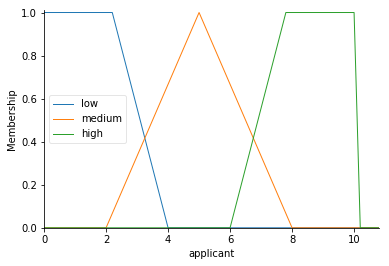

In [84]:
applicant['low'] = fuzz.trapmf(applicant.universe, [0, 0,2.2,4])
applicant['medium'] = fuzz.trimf(applicant.universe, [2,5,8])
applicant['high'] = fuzz.trapmf(applicant.universe, [6,7.8,10,10])
applicant.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


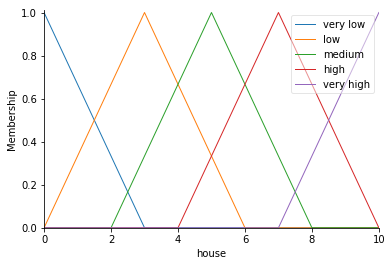

In [85]:
house['very low'] = fuzz.trimf(house.universe, [0, 0,3])
house['low'] = fuzz.trimf(house.universe, [0,3,6])
house['medium'] = fuzz.trimf(house.universe, [2,5,8])
house['high'] = fuzz.trimf(house.universe, [4,7,10])
house['very high'] = fuzz.trimf(house.universe, [7,10,10])
house.view()

/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


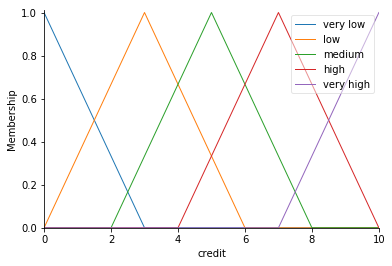

In [86]:
credit['very low'] = fuzz.trimf(credit.universe, [0, 0,3])
credit['low'] = fuzz.trimf(credit.universe, [0,3,6])
credit['medium'] = fuzz.trimf(credit.universe, [2,5,8])
credit['high'] = fuzz.trimf(credit.universe, [4,7,10])
credit['very high'] = fuzz.trimf(credit.universe, [7,10,10])
credit.view()

In [87]:
#define rules
rule1 = ctrl.Rule(applicant['medium'] & house['very low'] , credit['low'])
rule2 = ctrl.Rule(applicant['medium'] & house['low'] , credit['low'])
rule3 = ctrl.Rule(applicant['medium'] & house['medium'] , credit['medium'])
rule4 = ctrl.Rule(applicant['medium'] & house['high'] , credit['high'])
rule5 = ctrl.Rule(applicant['high'] & house['very low'] , credit['low'])
rule6 = ctrl.Rule(applicant['high'] & house['low'] , credit['medium'])
rule7 = ctrl.Rule(applicant['high'] & house['medium'] , credit['high'])
rule8 = ctrl.Rule(applicant['high'] & house['high'] , credit['high'])
rule9 = ctrl.Rule(applicant['medium'] & house['very high'] , credit['high'])
rule10 = ctrl.Rule(applicant['high'] & house['very high'] , credit['very high'])
rule11 = ctrl.Rule(income['low'] & interest['medium'] , credit['very low'])
rule12 = ctrl.Rule(income['low'] & interest['high'] , credit['very low'])
rule13 = ctrl.Rule(income['medium'] & interest['high'] , credit['low'])
rule14 = ctrl.Rule(applicant['low'] , credit['very low'])
rule15 = ctrl.Rule(income['low'] , credit['very low'])

In [88]:
credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
predict_credit = ctrl.ControlSystemSimulation(credit_ctrl)

In [89]:
predict_credit.input['house'] = house_value
predict_credit.input['applicant'] = app_value
predict_credit.input['income'] = 50
predict_credit.input['interest'] = 5

# Crunch the numbers
predict_credit.compute()

5.203031503734435


/usr/lib/python3.7/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


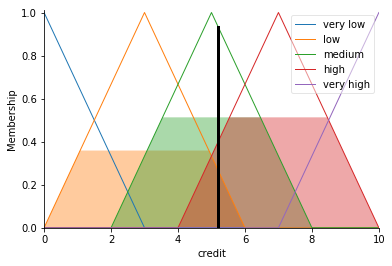

In [90]:
credit_value = predict_credit.output['credit']
print(credit_value)
credit.view(sim=predict_credit)

In [91]:
#FUZZY ADDITION

In [92]:
val = fuzzymath.fuzzy_add([1,2,3,4,5],[0.3,0.6,1,0.7,0.2],[10,11,12],[0.5,1,0.5])
print(val[0])
print(val[1])

[11. 12. 13. 14. 15. 16. 17.]
[0.3 0.5 0.6 1.  0.7 0.5 0.2]
